# Causes Behind Homicides 


For this project I wanted to tackle the problem of the [United States elevated Homicide Rate](https://www.statista.com/statistics/1374211/g7-country-homicide-rate/) compared to other highly developed nations. Much of the consideration around this topic resolves around Poverty, Gun Ownership, and Mental Health. Specifically, I wanted to look at the these different metrics at a county level using Census and CDC datasources; In this notebook I will go step-by-step through the model creation process. I hope you find this project informative and interesting. 

My DataSources are dervied from these link: 

Population Density (2020): 
https://covid19.census.gov/datasets/21843f238cbb46b08615fc53e19e0daf_1/explore?location=18.286026%2C0.315550%2C2.18&showTable=true

Suicides, Homicides, and Drug and Alcohol Related Death(2010-2020): https://wonder.cdc.gov/controller/datarequest/

Income & Poverty (2022): https://www.census.gov/programs-surveys/saipe.html

Before diving into the data in order to protect the privacy counties, the CDC will supress data if the count is low enough to track the cause of death back to the deceased. These are some consideration I had to take tackle when working on this project. I will walk through the data cleaning process and finally the model construction step by step over three notebooks. 

First lets import some of the libraries we will be using. 

## Part 3: Model Creation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
import numpy as np

First, we will import the Modeling Data that we generated form the last notebook: Part 2: EDA. Below we can the describe function from pandas to get a overview of the data. I have also included the coorelation coefficent between the variables which I have discussed more in the previous notebook. 

In [2]:
df= pd.read_csv('data/Modeling_Data.csv')
df.describe(include = 'all')

,County,State,Population,X_Firearms,X_DA,X_PopDen,X_Poverty,X_Suicide,Y_Homicides
count,1809,1809,1.809000e+03,1703.000000,1652.000000,1809.000000,1809.000000,1736.000000,1809.000000
unique,1809,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Autauga County, AL",TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.820601e+06,0.590291,30.680925,3.648142,15.003648,0.000167,1.677616
std,NaN,NaN,4.605642e+06,0.131138,14.196851,1.530110,5.755975,0.000064,0.711241
min,NaN,NaN,1.289000e+03,0.061549,0.000000,0.014260,3.100000,0.000000,0.000000
25%,NaN,NaN,2.819700e+05,0.521280,21.583331,2.747531,10.800000,0.000130,1.292579
50%,NaN,NaN,5.907970e+05,0.600000,28.134258,3.507091,14.300000,0.000160,1.724626
75%,NaN,NaN,1.552790e+06,0.675162,37.257815,4.555915,18.300000,0.000192,2.134316


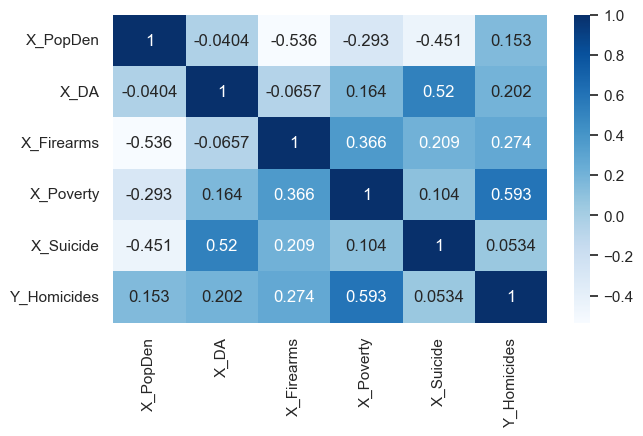

In [3]:
df.head()
df_corr = df[['X_PopDen','X_DA','X_Firearms','X_Poverty','X_Suicide','Y_Homicides']]

plt.figure(figsize=(7,4))
sns.set_theme(style="white")
corr = df_corr.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.3g')

First, we can approach the problem doing a simple linear regression. Here I am grabbing all the X_ columns : so we are checking for X_DA, X_Firearms, X_Poverty, X_Suicide, X_PopDen. I am also replacing the null values with 0 for this model. This will be a starting point for our analysis. We will use cross validation, which will limit overfitting. Here we can see that our CV Score is .57 and .035. This already can be [considering a good score for a social science study](https://mpra.ub.uni-muenchen.de/115769/1/MPRA_paper_115769.pdf). 

We follow the standard process were we split our data into a training and testing sets, and then perform cross validation on the training data. 

In [7]:
X = np.array(df[[x for x in df.columns if 'X_' in x]])
y = np.array(df['Y_Homicides'])
X = np.nan_to_num(X, nan = 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  

print("Cross-Validation Std:", np.std(cv_scores))
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Std: 0.03548824554830183
Mean Cross-Validation Score: 0.5731900755653252


One way to pair down some of our variables, and ensure that we can eliminate some of the colineariaty between the variables, is to use a for loop to do the Linear Regression excluding one of the variables. Here we can see that Poverty is the most important cariables and exclusing it drops our R2 score down to .254. Additionally, we can see that PopDensity and Firearms, while not as significant, also has a effect on the R2 score. However, excluding suicides and DA keep the score roughly the same. Therefore, we can comfortably the remove those variables from future models. This came as somewhat of a suprise to me since mental health is often pointed to as a major cause gun violence. However, both these variables did not help the model. 

In [5]:
for col in [x for x in df.columns if 'X_' in x]: 
    print(col)
    X = np.array(df[[x for x in df.columns if 'X_' in x if x != col]])
    y = np.array(df['Y_Homicides'])
    X = np.nan_to_num(X, nan = 0)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    model = LinearRegression()
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)  

    print("Cross-Validation Std:", np.std(cv_scores))
    print("Mean Cross-Validation Score:", np.mean(cv_scores))

X_Firearms
Cross-Validation Std: 0.01892114428462419
Mean Cross-Validation Score: 0.5244839059257319
X_DA
Cross-Validation Std: 0.04115766620584481
Mean Cross-Validation Score: 0.570404622150738
X_PopDen
Cross-Validation Std: 0.052225439877570244
Mean Cross-Validation Score: 0.48541876861184113
X_Poverty
Cross-Validation Std: 0.03465772779943567
Mean Cross-Validation Score: 0.25405494343066765
X_Suicide
Cross-Validation Std: 0.036595171568550196
Mean Cross-Validation Score: 0.5723716940741526


Next, we can try to impute some values into the Nan values of X_Firearms based on the mean of the State the county is in. This is one common way to deal with missing data. Doing so did dropped the score .504, and I decided that replacing the NaNs with 0s moving forward. 

In [9]:
df_imputed = df.copy()

df_imputed['X_Firearms'] = df_imputed['X_Firearms'].fillna(df_imputed.groupby('State')['X_Firearms'].transform('mean'))

X = np.array(df_imputed[['X_PopDen','X_Firearms','X_Poverty']])
y = np.array(df_imputed['Y_Homicides'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  

print("Cross-Validation Std:", np.std(cv_scores))
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Std: 0.0408466452007898
Mean Cross-Validation Score: 0.5043945222229


I had done some further expirimentation using Polynomial Features, however these were largely fruitless. I decided to move forward with the model composed of Poverty, Firearms, Population Density. I rerun the model and this time scale of the MinMaxScaler which will compress all our variables between 0 and 1, in order to be able compare our coefficients better. As you can see, despite dropping two of the variables compared to our first model, our test score is actually close to our cross validation score, which is a strong result. 

In [43]:
df_model = df[['County', 'Population' ,'X_Poverty', 'X_Firearms', 'X_PopDen', 'Y_Homicides']]


df_X_train, df_X_test, y_train, y_test = train_test_split(df_model , np.array(df_model['Y_Homicides']), test_size=0.2, random_state=101)

scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(df_X_train[['X_Poverty', 'X_Firearms', 'X_PopDen']])
X_train = np.nan_to_num(X_train, 0)

X_test = scaler.transform(df_X_test[['X_Poverty', 'X_Firearms', 'X_PopDen']])
X_test = np.nan_to_num(X_test, 0)


model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5737053099045907

Now we can take a look at our variables. Here I will review what each variable actually repersents before drawing conclusions from the data. 
Poverty : percentage of those under 18 poverty
PopDen : This is a log adjusted Population Density (/km2)
Firearms : This is a proxy for gun ownership taken from taking Firearms Suicides divided by all Suicides 

Now we can take a look at the coefficents. Poverty is clearly the largest driver of Homicides, but PopDen and Firearms also seem to have a major impact. It's hard to compare directly between the two since their coefficents are not very far apart. The conclusion we can reach is that as Povery, Firearms Ownership, and Population Density goes up so do Homicides. This is somewhat intuitive since both the latter two variables would include the oppurtunities of a fatal encounter. 

In [44]:
for x,c in zip(['X_Poverty', 'X_Firearms', 'X_PopDen'],model.coef_): 
    x = x.split('_')[1]
    print(f'{x}: {c}')

Poverty: 3.029276228761831
Firearms: 1.1283706649216614
PopDen: 1.6774819402178895


Next we can alook at the distrubution of our residuals (absolute values) as well as grabbing some outlier values. 

<Axes: >

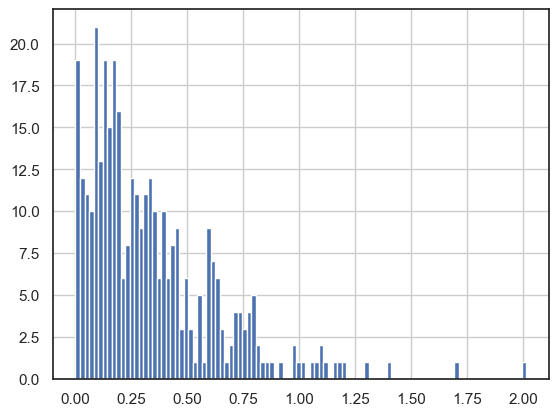

In [45]:
df_X_test['Pred'] = model.predict(X_test)
df_X_test['Residual'] = df_X_test['Y_Homicides'] - df_X_test['Pred']

np.abs(df_X_test['Residual']).hist(bins = 100)

In [46]:
df_X_test['Residual'] = np.abs(df_X_test['Residual'])

print('Total Rows: ',len(df_X_test))
print('Rows over .75 off: ',len(df_X_test.sort_values(['Residual'],ascending=False).loc[df_X_test['Residual']>.75]))
df_X_test.sort_values(['Residual'],ascending=False).loc[df_X_test['Residual']>.75]

Total Rows:  362
Rows over .75 off:  33


,County,Population,X_Poverty,X_Firearms,X_PopDen,Y_Homicides,Pred,Residual
1252,"Jefferson County, OK",68842,21.3,0.736842,1.427036,0.000000,2.014062,2.014062
619,"Pendleton County, KY",160488,14.4,0.690476,3.055295,0.000000,1.692375,1.692375
971,"Mineral County, NV",50053,16.3,0.687500,0.376806,0.000000,1.395953,1.395953
1541,"Hidalgo County, TX",9188854,27.4,0.447566,5.345994,1.490418,2.780927,1.290510
602,"Knox County, KY",347209,33.1,0.702128,3.479717,2.031334,3.221141,1.189807
1020,"Rio Arriba County, NM",435971,18.1,0.525773,1.278003,2.676423,1.488526,1.187896
776,"Lake County, MN",117683,8.4,0.904762,1.076592,0.000000,1.161561,1.161561
74,"Northwest Arctic Borough, AK",84513,19.7,0.547170,0.080442,2.551981,1.441319,1.110662
969,"Humboldt County, NV",186219,9.7,0.689655,0.516998,2.007412,0.911525,1.095886
631,"Wayne County, KY",226413,28.8,0.756098,2.910544,1.767873,2.860311,1.092438


From our distribution, we can see the bulk falls under .75, therefore I marked those greater then .75 as outliers. Of our 362 test counties, and 33 are outside .75 resisdual. From those (see above) it doesn't appear to be any over arching pattern. 

For our final model, we had a test set R2 score .57. The primary take away is that while Poverty is the major factor in driving Homicides, population density and Firearms ownership also positivly coorelate with Homicides as well. Personally, I found it suprising that the mental health metrics we had used did not contribute to the model, but this will require further analysis before we can outright dismiss it. 

There are some ways we can potentially improve our analysis. We can try to bring in other variables such as Income Inequality, better Mental Health Metrics, and different population breakdowns since counties are so variable in size, and different parts of counties can be wildly different. Additionally, we did not adjust any of our Poverty for Cost of Living. Overall, I think the model preformed well, and it shows a clear contribution from both Population Density as well as Firearms ownership in Gun Violence.